This is the notebook for my EDA step of my book recommendation system. In the last step (Data Wrangling), I deleted multiple columns that weren't useful for my analysis in order to decrease the filesize. I was only left with a few variables to analyze. 

In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
path = Path(os.getcwd()).parents[0]
file = os.path.join(path,'data/processed','DataWranglingOutput.csv')
df = pd.read_csv(file, index_col = 'review_id')
df.head()

,user_id,book_id,rating,n_votes,n_comments
review_id,,,,,
dfdbb7b0eb5a7e4c26d59a937e2e5feb,8842281e1d1347389f2ab93d60773d4d,18245960,5,28,1
52c8ac49496c153e4a97161e36b2db55,8842281e1d1347389f2ab93d60773d4d,5577844,5,5,1
885c772fb033b041f42d57cef5be0a43,8842281e1d1347389f2ab93d60773d4d,17315048,5,25,5
46a6e1a14e8afc82d221fec0a2bd3dd0,8842281e1d1347389f2ab93d60773d4d,13453029,4,5,1
a582bfa8efd69d453a5a21a678046b36,8842281e1d1347389f2ab93d60773d4d,13239822,3,7,0


In [3]:
df.shape

(3310879, 5)

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
book_id,3310879.0,1.267044e+07,9.519649e+06,1.0,4836041.0,12127810.0,18798983.0,36513159.0
rating,3310879.0,3.946458e+00,1.043533e+00,1.0,3.0,4.0,5.0,5.0
n_votes,3310879.0,1.239947e+00,9.900566e+00,-3.0,0.0,0.0,1.0,2642.0
n_comments,3310879.0,3.192684e-01,2.721032e+00,-2.0,0.0,0.0,0.0,930.0


<b>User_id </b>

To explore the user_id variable, I created a pivot table summarizing the activity of each unique user. 

In [5]:
pivot = df.pivot_table(index='user_id', values = ['book_id','n_comments','n_votes','rating'],aggfunc={'book_id':pd.Series.nunique,'n_comments':np.sum,'n_votes':np.sum,'rating':np.mean})

In [6]:
pivot.head()

,book_id,n_comments,n_votes,rating
user_id,,,,
00000377eea48021d3002730d56aca9a,1,0,0,5.000000
00009e46d18f223a82b22da38586b605,17,3,0,3.352941
0000c3d51aa099745e93a4e99c4856c8,70,18,14,3.957143
0001085188e302fc6b2568de45a5f56b,1,0,6,3.000000
000157a6f8331e9c9a21252e1fee91d1,1,0,0,2.000000


In [7]:
pivot.shape,
pivot.book_id.mean(), 
pivot.n_comments.mean(),
pivot.n_votes.mean(),
pivot.rating.mean(), 
pivot.book_id.max(), 
pivot.n_comments.max(),
pivot.n_votes.max()

38846

There are 251,184 unique users in the dataset. The average reader read 13 books, received 4 comments and 16 votes, and gave the books they read an average rating of 4. The largest number of books read was 2866; the largest number of comments received was 8219, and the largest number of votes received was 38846! 

These stats are interesting, but I wanted to get some visuals on the distribution of this data. 

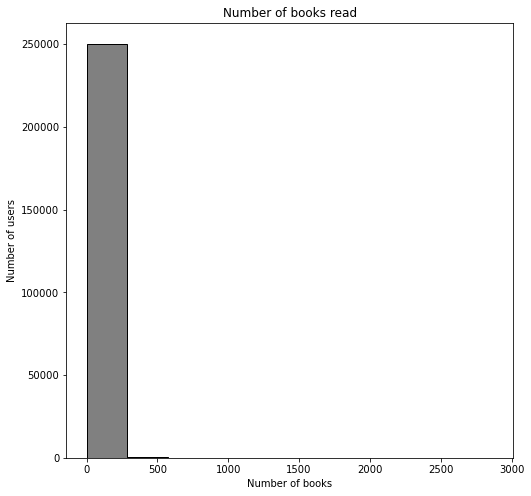

In [8]:
plt.figure(figsize=(8,8))
plt.hist(pivot.book_id,color='gray',edgecolor='black')
plt.title('Number of books read')
plt.xlabel('Number of books')
plt.ylabel('Number of users')
plt.show()

In [9]:
pivot.book_id.describe()

count    251184.000000
mean         13.181090
std          40.119263
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max        2866.000000
Name: book_id, dtype: float64

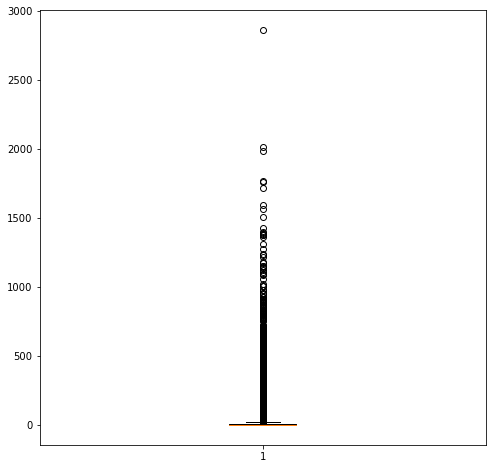

In [10]:
plt.figure(figsize=(8,8))
plt.boxplot(pivot.book_id)
plt.show()

In [11]:
scipy.stats.percentileofscore(pivot.book_id,13)

80.06341964456335

Even though the average user read 13 books, we can see that the mean does not accurately represent the whole dataset. From the charts and stats above, we can see that most people in the dataset have read less than 10 books. Only in the final quartile of the dataset do we see many avid readers. In fact, even though the mean is 13, we don't see users reading 13 books or more until we get to the 80th percentile. These readers are skewing the mean and the data distribution. 

<b>Book_id</b>

I made another pivot table showing activity based on book_id. I explored the data in the same way as the user_id variable.

In [12]:
pivot2 = df.pivot_table(index='book_id', values = ['user_id','n_comments','n_votes','rating'],aggfunc={'user_id':pd.Series.nunique,'n_comments':np.sum,'n_votes':np.sum,'rating':np.mean})

In [13]:
pivot2.head()

,n_comments,n_votes,rating,user_id
book_id,,,,
1,510,2399,4.642520,3603
2,886,4976,4.490783,3743
3,2272,10482,4.569879,8207
4,13,105,4.444444,45
6,691,3718,4.657582,4036


In [14]:
pivot2.shape,
pivot2.user_id.mean(), 
pivot2.n_comments.mean(),
pivot2.n_votes.mean(),
pivot2.rating.mean(), 
pivot2.user_id.max(), 
pivot2.n_comments.max(),
pivot2.n_votes.max()

28392

It looks like there are 253,575 unique books in the dataset. On average, each book had 13 readers, 4 comments, 16 votes, and a rating of 3.87. The greatest number of users, comments and votes received by any book was 10131, 3898, and 28392 respectively!

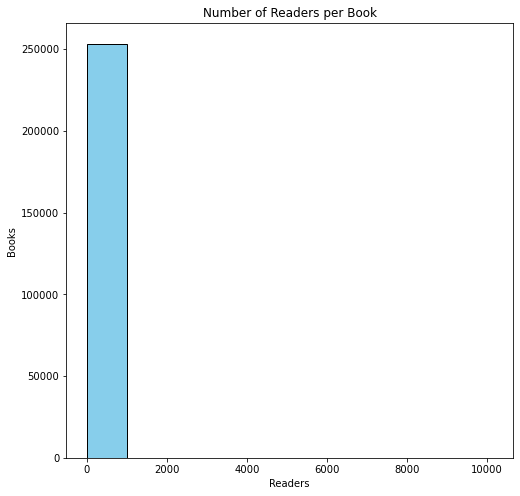

In [15]:
plt.figure(figsize=(8,8))
plt.hist(pivot2.user_id,color='skyblue',edgecolor='black')
plt.title('Number of Readers per Book')
plt.xlabel('Readers')
plt.ylabel('Books')
plt.show()

In [16]:
pivot2.user_id.describe()

count    253575.000000
mean         13.056804
std         106.867651
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max       10131.000000
Name: user_id, dtype: float64

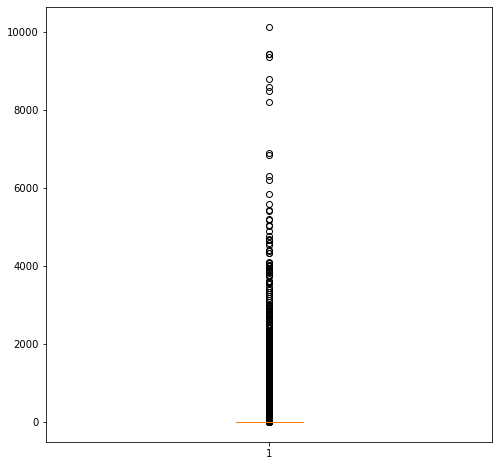

In [17]:
plt.figure(figsize=(8,8))
plt.boxplot(pivot2.user_id)
plt.show()

In [18]:
scipy.stats.percentileofscore(pivot2.user_id, 13)

86.98550724637681

Once again we see that just the basic stats such as mean and max do not show the full picture. The figures and stats above show the same trends as with the data on books per user. In the basic stats I did above, the average number of users that read each book is around 13. However, 13 users is at the 87th percentile! This shows that most books are only read by a few people, and less than a quarter of the books in this dataset are read by many people. Those few popular books are heavily skewing the data. 

I exported these tables because I thought they might be useful later.

In [19]:
export = os.path.join(path,'data/processed')
pivot.to_csv(os.path.join(path,'data/processed','UserID_Pivot.csv'))
pivot2.to_csv(os.path.join(path,'data/processed','BookID_Pivot.csv'))

<b> Rating </b>

Next, I explored the rating variable, which will be the most important variable for my model. However, since the data is not as skewed, there weren't as many interesting takeaways. 

In [20]:
df.rating.describe()

count    3.310879e+06
mean     3.946458e+00
std      1.043533e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Just by getting the basic stats of the rating column, I found that the mean rating is just under 4. I made a histogram to see the spread of the data. There are far more ratings of 4 or 5 than 1 or 2. People really seem to enjoy scifi/fantasy!

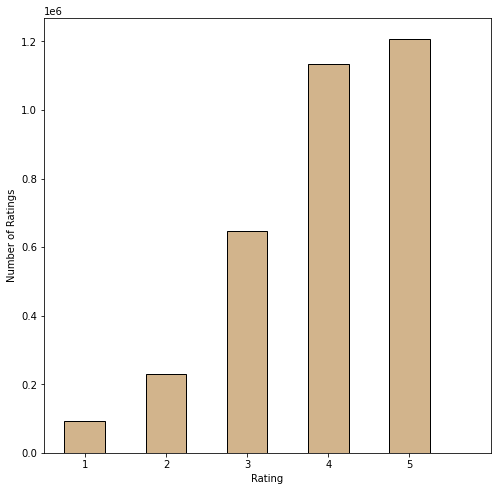

In [21]:
plt.figure(figsize=(8,8))
plt.hist(df.rating, color='tan', align='left',range=(1,6),edgecolor='black')
plt.xticks(range(1,6))
plt.ylabel('Number of Ratings')
plt.xlabel('Rating')
plt.show()

In [22]:
df.rating.value_counts()

5    1208212
4    1133818
3     646191
2     228683
1      93975
Name: rating, dtype: int64

In [23]:
df.rating.value_counts()/df.rating.count()

5    0.364922
4    0.342452
3    0.195172
2    0.069070
1    0.028384
Name: rating, dtype: float64

From the calculation above, I can see that about 70% of the ratings are either a 4 or 5. Less than 10% of reviews gave a low rating (1 or 2).

<b>n_votes and n_comments</b>

In [24]:
df.n_comments.mean(),df.n_votes.mean()

(0.31926838763965704, 1.2399465519579544)

In [25]:
df.n_votes.mean()/df.n_comments.mean()

3.8837122620402456

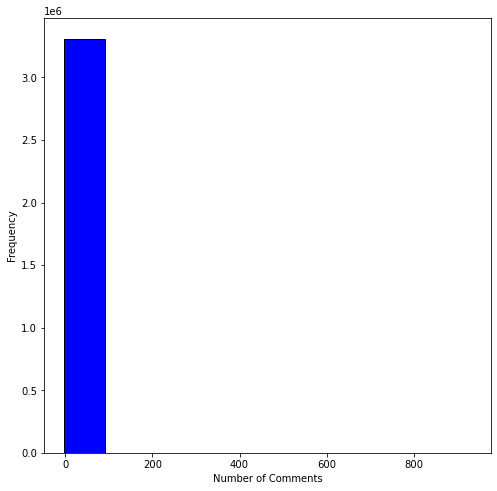

In [26]:
plt.figure(figsize=(8,8))
plt.hist(df.n_comments, color='blue',edgecolor='black')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()

In [27]:
df.n_comments.max()

930

It looks like the average review gets one vote and no comments (~.319). There are about 4 votes for every comment on a areview. Most reviews don't get noticed on Goodreads, so this data makes sense. Only reviewers with a large following will have lets of engagement on their reviews. 

The histogram seemingly only shows one bar near zero, which makes sense given that the average number of comments is less than 1. This certainly is not a normal distrubution due to the fact that there are a few reviews with lots of engagement. The largest number of comments a review received was 930, which skews the distribution. 

As with the user_id and book_id variables, I made a boxplot to get a better visual on the spread of the data. 

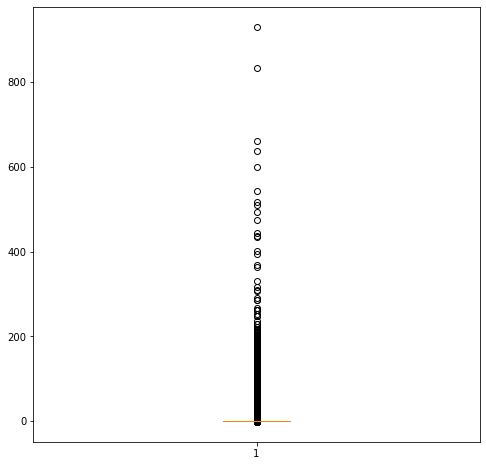

In [28]:
plt.figure(figsize=(8,8))
plt.boxplot(df.n_comments)
plt.show()

In [29]:
scipy.stats.percentileofscore(df.n_comments,0.31926838763965704)

91.91018457636174

As seen before, the mean doesn't accurately represent the data. The mean number of comments (~.319) doesn't show up until the 91st percentile! I did the same stats for n_votes below. 

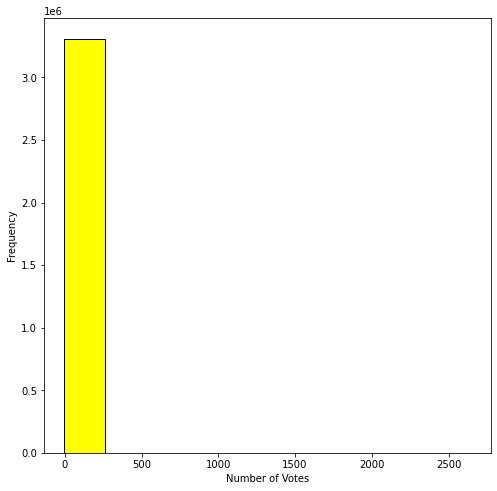

In [30]:
plt.figure(figsize=(8,8))
plt.hist(df.n_votes, color='yellow',edgecolor='black')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

In [31]:
df.n_votes.max()

2642

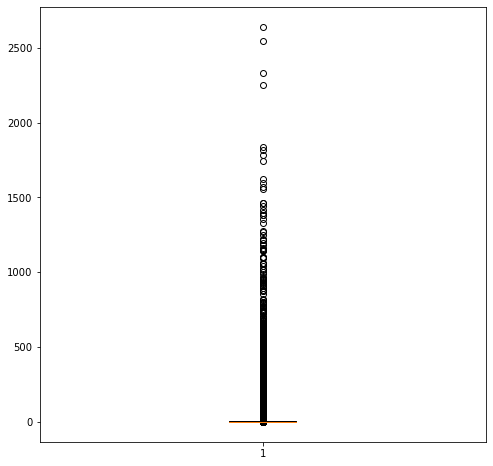

In [32]:
plt.figure(figsize=(8,8))
plt.boxplot(df.n_votes)
plt.show()

In [33]:
scipy.stats.percentileofscore(df.n_votes,1.2399465519579544)

86.27884015090856

<b> Visualizing the relationships in the data </b>

Now it's time to see if there are any relationships among these variables.

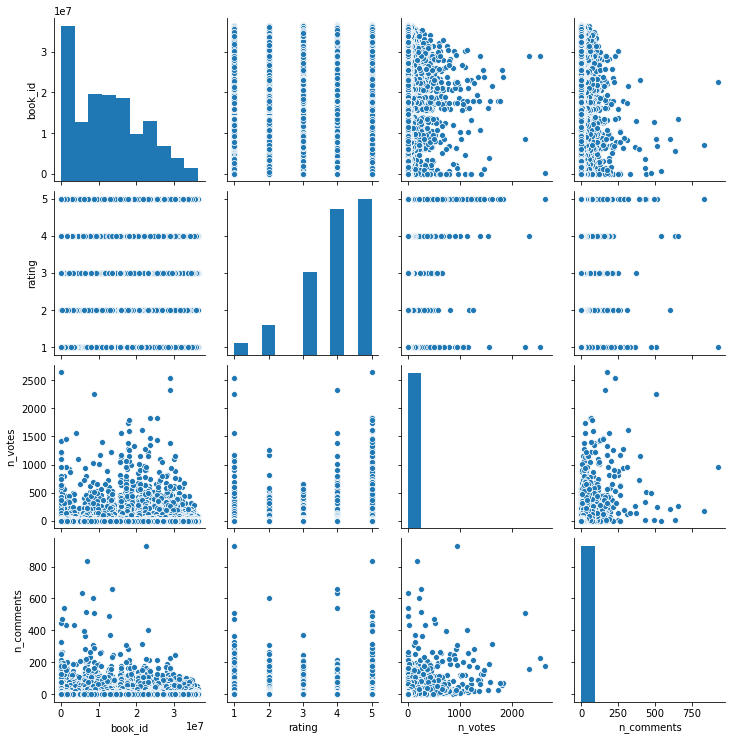

In [34]:
pair = sns.pairplot(df)
pair

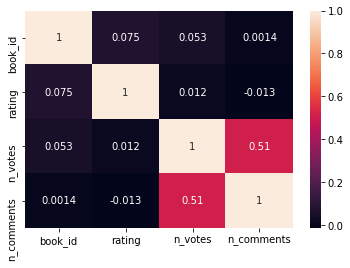

In [35]:
sns.heatmap(df.corr(), annot=True)

Unsurprisingly, there are no strong correlations among these variables. The only relationship to note is the correlation of 0.51 for n_votes and n_comments. This makes sense, since reviews that get votes are also likely to get comments. The book_id is a unique identifier so it wouldn't have a relationship to any of the other variables. Finally, the heatmap and pairplot confirm what I already suspected: any particular rating given in a review does not mean that the review will get any votes or comments. 

The common theme in this dataset is that the avid readers in the final quartile of the data are heavily skewing the distribution and statistics of the dataset. For this particular project, this shouldn't be an issue. I'm looking for recommendations based on user reading history, so more books read means more data to make accurate recommendations, even if much of the data is only held by a quartile of the total users. 

I finished up my EDA by creating one last pivot table that neatly organizes all the activity by unique user. This table is more visually appealing and could be a good reference when assessing the recommendations that my model makes.  

In [36]:
pivot3 = df.pivot_table(index=['user_id','book_id'])

In [37]:
pivot3.head(20)

n_comments  n_votes  rating
user_id                          book_id                              
00000377eea48021d3002730d56aca9a 10271968           0        0       5
00009e46d18f223a82b22da38586b605 4407               0        0       3
                                 7341               0        0       3
                                 8908               0        0       3
                                 13496              0        0       3
                                 14497              1        0       3
                                 40395              0        0       3
                                 41539              0        0       4
                                 41865              0        0       3
                                 49041              0        0       2
                                 136251             0        0       5
                                 5899779            0        0       5
                                 6065215            0        0       3
                                 9460487            0        0       4
                                 13453029           0        0       3
                                 13577402           0        0       3
                                 20829029           0        0       3
                                 31304766           2        0       4
0000c3d51aa099745e93a4e99c4856c8 345627             6        1       3
                                 704043             0        0       4

In [38]:
pivot3.to_csv(os.path.join(path,'data/processed','BooksPerUser.csv'))